In [ ]:
pip install opendatasets --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/puneet6060/intel-image-classification'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ritikagrawal4
Your Kaggle Key: ··········


  1%|▏         | 5.00M/346M [00:00<00:07, 45.6MB/s]

100%|██████████| 346M/346M [00:04<00:00, 88.5MB/s]


In [ ]:
import os

os.chdir('/content/intel-image-classification/')
import os
cwd = os.getcwd()
cwd

'/content/intel-image-classification'

In [ ]:
Train = './seg_train/seg_train'
Validation = './seg_test/seg_test'
Test = './intel-image-classification/seg_pred/seg_pred'

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import MaxPool2D, Conv2D, Flatten, Dense, Activation


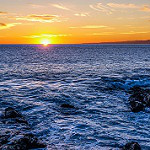

In [ ]:
im1 = Image.open(Train + "/sea/10071.jpg")
im1

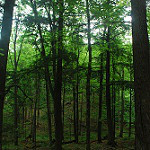

In [ ]:
im2 = Image.open(Train + "/forest/10051.jpg")
im2

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True)

test_generator = ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(Train, target_size = (64,64), batch_size = 64)

test_batch = test_generator.flow_from_directory(Validation, target_size = (64,64), batch_size = 64)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu',kernel_initializer='random_uniform',bias_initializer='random_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(3000,activation='relu',kernel_initializer='random_uniform',bias_initializer='random_uniform'))
model.add(Dense(units=6,activation='softmax',  kernel_initializer='random_uniform', bias_initializer='random_uniform'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 3000)              92259000  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 18006     
Total params: 92,277,902
Trainable params: 92,277,902
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(train_batch,
          steps_per_epoch = 100,
          epochs = 5,
          validation_data = test_batch,
          validation_steps = 100)

Epoch 1/5
100/100 [==============================] - 47s 146ms/step - loss: 2.6643 - accuracy: 0.3946 - val_loss: 0.9584 - val_accuracy: 0.6430
Epoch 2/5
100/100 [==============================] - 12s 123ms/step - loss: 0.9426 - accuracy: 0.6342
Epoch 3/5
100/100 [==============================] - 12s 120ms/step - loss: 0.8964 - accuracy: 0.6577
Epoch 4/5
100/100 [==============================] - 12s 121ms/step - loss: 0.8055 - accuracy: 0.6945
Epoch 5/5
100/100 [==============================] - 12s 120ms/step - loss: 0.8019 - accuracy: 0.7057


In [ ]:
def image_pred(path, model):
  imm = Image.open(path)
  imm = imm.resize((64,64))
  x = np.array(imm)
  x = np.expand_dims(x,axis=0)
  classs=model.predict_classes(x)
  l = os.listdir("/content/intel-image-classification/seg_train/seg_train")
  l.sort()
  return l[classs[0]]

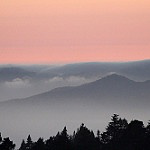

In [ ]:
im=Image.open("/content/intel-image-classification/seg_pred/seg_pred/10047.jpg")
im

In [ ]:
image_pred("/content/intel-image-classification/seg_pred/seg_pred/10047.jpg", model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'sea'

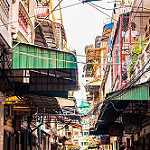

In [ ]:
im=Image.open("/content/intel-image-classification/seg_pred/seg_pred/10082.jpg")
im

In [ ]:
image_pred("/content/intel-image-classification/seg_pred/seg_pred/10082.jpg", model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'buildings'

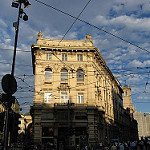

In [ ]:
im=Image.open("/content/intel-image-classification/seg_pred/seg_pred/10048.jpg")
im

In [ ]:
image_pred("/content/intel-image-classification/seg_pred/seg_pred/10048.jpg", model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'buildings'

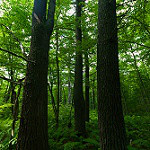

In [ ]:
im=Image.open("/content/intel-image-classification/seg_pred/seg_pred/10178.jpg")
im

In [ ]:
image_pred("/content/intel-image-classification/seg_pred/seg_pred/10178.jpg", model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'forest'

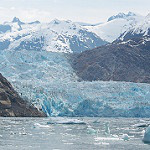

In [ ]:
im=Image.open("/content/intel-image-classification/seg_pred/seg_pred/101.jpg")
im

In [ ]:
image_pred("/content/intel-image-classification/seg_pred/seg_pred/101.jpg", model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'glacier'